In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso

In [2]:
df=pd.read_csv('bengaluru_house_prices.csv')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'bengaluru_house_prices.csv'

In [3]:
df.shape

(13320, 9)

In [4]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [5]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [7]:
df1=df.drop(['area_type','society','availability','balcony'],axis=1)
df1.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [8]:
df1.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2=df1.dropna()
df2.isna().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df2.shape

(13246, 5)

In [11]:
df2['BHK']=df2['size'].apply(lambda x: int(x.split(' ')[0]))
df2.head()

C:\Users\Guru Prasad\AppData\Local\Temp\ipykernel_11564\691441003.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['BHK']=df2['size'].apply(lambda x: int(x.split(' ')[0]))


,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [12]:
type(df2['BHK'][0])

numpy.int64

In [13]:
df2['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [14]:
df2[df2.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [15]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df2[~df2['total_sqft'].apply(is_float)].head()

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2


In [18]:
def is_floats(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [19]:
df2['total_sqfts']=df2['total_sqft'].apply(is_floats)

C:\Users\Guru Prasad\AppData\Local\Temp\ipykernel_11564\1006504196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['total_sqfts']=df2['total_sqft'].apply(is_floats)


In [20]:
df3=df2.copy()
df3.head()

,location,size,total_sqft,bath,price,BHK,total_sqfts
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,1056.0
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,2600.0
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,1440.0
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,1521.0
4,Kothanur,2 BHK,1200,2.0,51.00,2,1200.0


In [21]:
df3[df3['total_sqfts'].isna()]

,location,size,total_sqft,bath,price,BHK,total_sqfts
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.50,1,NaN
648,Arekere,9 Bedroom,4125Perch,9.0,265.00,9,NaN
775,Basavanagara,1 BHK,1000Sq. Meter,2.0,93.00,1,NaN
872,Singapura Village,2 BHK,1100Sq. Yards,2.0,45.00,2,NaN
1019,Marathi Layout,1 Bedroom,5.31Acres,1.0,110.00,1,NaN
1086,Narasapura,2 Bedroom,30Acres,2.0,29.50,2,NaN
1400,Chamrajpet,9 BHK,716Sq. Meter,9.0,296.00,9,NaN
1712,Singena Agrahara,3 Bedroom,1500Sq. Meter,3.0,95.00,3,NaN
1743,Hosa Road,3 BHK,142.61Sq. Meter,3.0,115.00,3,NaN
1821,Sarjapur,3 Bedroom,1574Sq. Yards,3.0,76.00,3,NaN


In [22]:
df4=df3.drop(['size','total_sqft'],axis=1)
df4.loc[30]

location       Yelahanka
bath                 4.0
price              186.0
BHK                    4
total_sqfts       2475.0
Name: 30, dtype: object

In [23]:
df5=df4.copy()
df5['price_per_sqft']=df5['price']*100000/df5['total_sqfts']
df5.head()

,location,bath,price,BHK,total_sqfts,price_per_sqft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,51.00,2,1200.0,4250.000000


In [24]:
len(df5.location.unique())

1304

In [25]:
df5['location']=df5['location'].apply(lambda x: x.strip())

In [26]:
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [27]:
location_stats_less_than10=location_stats[location_stats.values<=10]

In [28]:
len(location_stats_less_than10)

1052

In [29]:
len(df5.location.unique())

1293

In [30]:
df5.location =df5.location.apply(lambda x: 'other' if x in location_stats_less_than10 else x)
len(df5.location.unique())

242

In [31]:
df5.head(10)

,location,bath,price,BHK,total_sqfts,price_per_sqft
0,Electronic City Phase II,2.0,39.07,2,1056.0,3699.810606
1,Chikka Tirupathi,5.0,120.00,4,2600.0,4615.384615
2,Uttarahalli,2.0,62.00,3,1440.0,4305.555556
3,Lingadheeranahalli,3.0,95.00,3,1521.0,6245.890861
4,Kothanur,2.0,51.00,2,1200.0,4250.000000
5,Whitefield,2.0,38.00,2,1170.0,3247.863248
6,Old Airport Road,4.0,204.00,4,2732.0,7467.057101
7,Rajaji Nagar,4.0,600.00,4,3300.0,18181.818182
8,Marathahalli,3.0,63.25,3,1310.0,4828.244275
9,other,6.0,370.00,6,1020.0,36274.509804


In [32]:
df5[df5['total_sqfts']/df5['BHK']<300].head()

,location,bath,price,BHK,total_sqfts,price_per_sqft
9,other,6.0,370.0,6,1020.0,36274.509804
45,HSR Layout,9.0,200.0,8,600.0,33333.333333
58,Murugeshpalya,4.0,150.0,6,1407.0,10660.980810
68,Devarachikkanahalli,7.0,85.0,8,1350.0,6296.296296
70,other,3.0,100.0,3,500.0,20000.000000


In [33]:
df5.shape

(13246, 6)

In [34]:
df6=df5[~(df5['total_sqfts']/df5['BHK']<300)]
df6.shape

(12502, 6)

In [35]:
df6.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [36]:
def remove_pps_outlier(df):
    df_out=pd.DataFrame()
    for keys,subdf in df.groupby('location'):
        m=np.mean(subdf.price_per_sqft)
        n=np.std(subdf.price_per_sqft)
        reduced_df=subdf[(subdf.price_per_sqft>(m-n)) & (subdf.price_per_sqft<=(m+n))]
        df_out=pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out

In [37]:
df7=remove_pps_outlier(df6)
df7.shape

(10241, 6)

In [38]:
def plt_scatter(df,location):
    bhk2=df[(df.location==location)&(df.BHK==2)]
    bhk3=df[(df.location==location)&(df.BHK==3)]
    plt.figure(figsize=(15,10))
    plt.scatter(bhk2.total_sqfts,bhk2.price,color='blue',label='2 BHK',s=50)
    plt.scatter(bhk3.total_sqfts,bhk3.price,marker='+',color='green',label='3 BHK',s=50)    
    plt.xlabel('Total Square feet area')
    plt.ylabel('Price Per Sqft')
    plt.title('location')
    plt.legend()

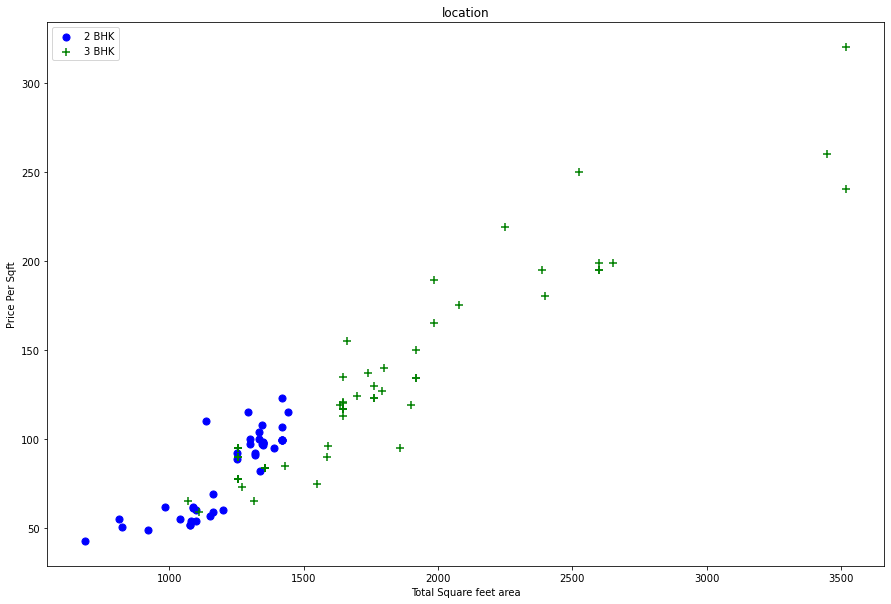

In [39]:
plt_scatter(df7,'Hebbal')

In [40]:
def remove_outlayer(df):
    exclude_indexes=np.array([])
    for location,location_df in df.groupby('location'):
        bhk_stats={}
        for bhk,bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df.price_per_sqft),
                'std':np.std(bhk_df.price_per_sqft),
                'count':bhk_df.shape[0]
            }
        for bhk,bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indexes=np.append(exclude_indexes,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indexes)

In [41]:
df8=remove_outlayer(df7)
df8.shape

(7329, 6)

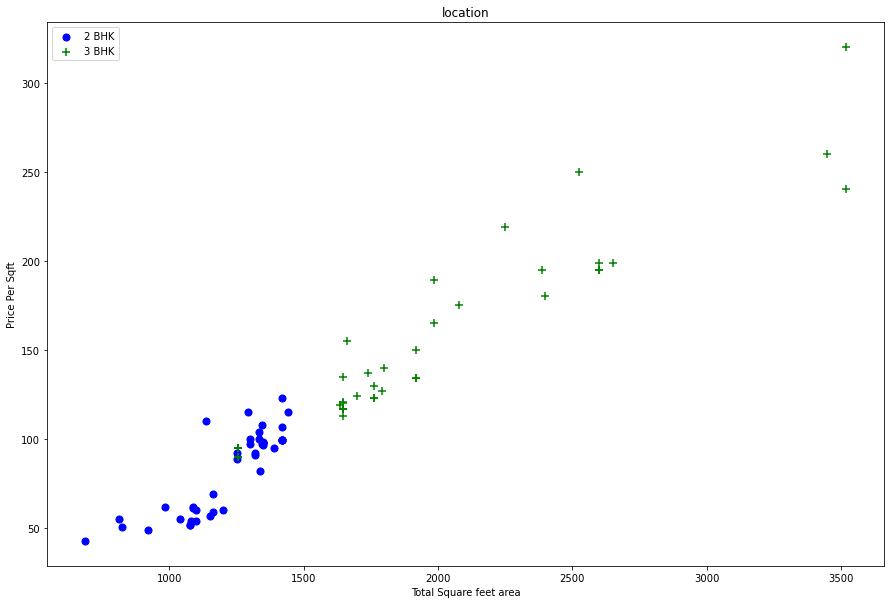

In [42]:
plt_scatter(df8,'Hebbal')

(array([ 548., 3591., 2300.,  457.,  253.,  115.,   39.,   16.,    5.,
           5.]),
 array([ 1300.        ,  3620.98039216,  5941.96078431,  8262.94117647,
        10583.92156863, 12904.90196078, 15225.88235294, 17546.8627451 ,
        19867.84313725, 22188.82352941, 24509.80392157]),
 <BarContainer object of 10 artists>)

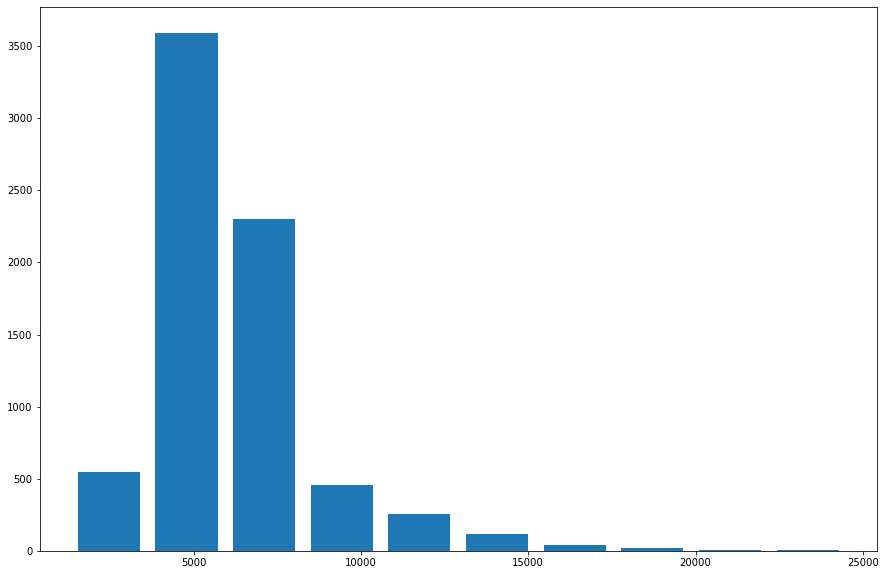

In [43]:
plt.figure(figsize=(15,10))
plt.hist(df8.price_per_sqft,rwidth=0.8)

In [44]:
df8.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [45]:
df8[df8.bath>10]

,location,bath,price,BHK,total_sqfts,price_per_sqft
5277,Neeladri Nagar,12.0,160.0,10,4000.0,4000.000000
8486,other,12.0,525.0,10,12000.0,4375.000000
8575,other,16.0,550.0,16,10000.0,5500.000000
9308,other,12.0,150.0,11,6000.0,2500.000000
9639,other,13.0,275.0,13,5425.0,5069.124424


(array([4.766e+03, 1.763e+03, 6.780e+02, 8.100e+01, 2.900e+01, 7.000e+00,
        0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

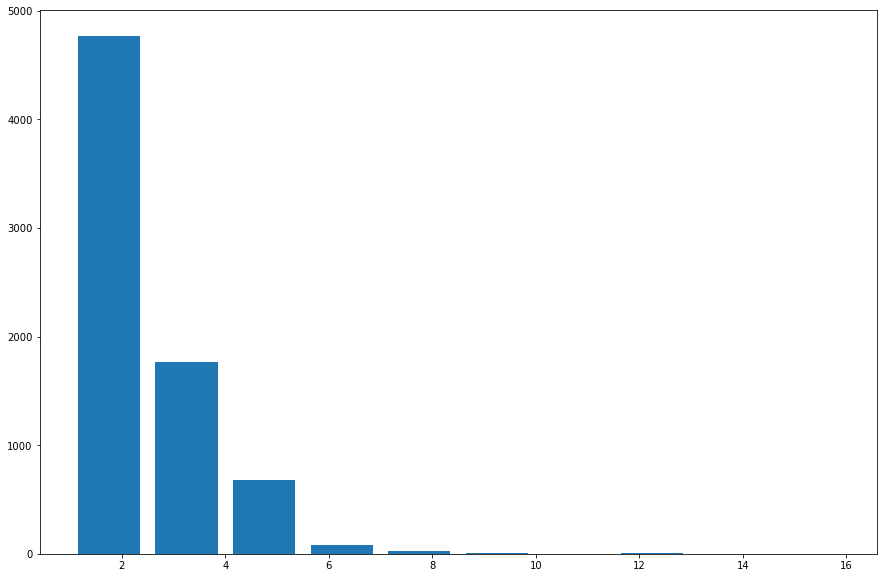

In [46]:
plt.figure(figsize=(15,10))
plt.hist(df8.bath,rwidth=0.8)

In [47]:
df9=df8[df8.bath<df8.BHK+2]
df9.shape

(7251, 6)

In [48]:
g=pd.get_dummies(df9.location)

In [49]:
df10=pd.concat([df9,g],axis=1)

In [50]:
df10.shape

(7251, 248)

In [51]:
df11=df10.drop(['price_per_sqft','other'],axis=1)

In [52]:
df11.shape

(7251, 246)

In [53]:
df11.head(3)

,location,bath,price,BHK,total_sqfts,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,4.0,428.0,4,2850.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,3.0,194.0,3,1630.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,2.0,235.0,3,1875.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
df12=df11.drop('location',axis=1)
df12.head(2)

,bath,price,BHK,total_sqfts,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,4.0,428.0,4,2850.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.0,194.0,3,1630.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
df12.shape

(7251, 245)

In [56]:
X=df12.drop('price',axis=1)
y=df12.price

In [57]:
y.shape

(7251,)

In [58]:
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
model=LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8452277697874524

In [63]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LinearRegression(),X,y,cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,y):
    algos={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decission_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        }
    }
    scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for algo_name,cofig in algos.items():
        gs=GridSearchCV(cofig['model'],cofig['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [65]:
find_best_model(X,y)

C:\Users\Guru Prasad\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\Guru Prasad\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

fro

C:\Users\Guru Prasad\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(
C:\Users\Guru Prasad\AppData\Roaming\Python\Python39\site-packages\sklearn\tree\_classes.py:397: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


,model,best_score,best_params
0,linear_regression,0.818354,{'normalize': True}
1,lasso,0.687434,"{'alpha': 1, 'selection': 'random'}"
2,decission_tree,0.715146,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


In [66]:
def predict_price(location,sqft,bath,bhk):
    loc_index=np.where(X.columns==location)[0][0]
    x=np.zeros(len(X.columns))
    x[0]=bath
    x[1]=bhk
    x[2]=sqft
    if loc_index>=0:
        x[loc_index]=1
    return model.predict([x])[0]

In [67]:
X.columns

Index(['bath', 'BHK', 'total_sqfts', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [68]:
predict_price('1st Phase JP Nagar',1000,2,2)

C:\Users\Guru Prasad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904676991532

In [69]:
predict_price('1st Phase JP Nagar',1000,3,3)

C:\Users\Guru Prasad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.80519395013899

In [70]:
predict_price('Indira Nagar',1000,2,2)

C:\Users\Guru Prasad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484012814

In [71]:
predict_price('Indira Nagar',1000,3,3)

C:\Users\Guru Prasad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.5843020203518

In [72]:
predict_price('Indira Nagar',1000,2,3)

C:\Users\Guru Prasad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


179.50527707580608

In [73]:
predict_price('Indira Nagar',1000,3,2)

C:\Users\Guru Prasad\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


186.35717978467392

In [74]:
import pickle
with open('banglore_home_prices_prediction.pickle','wb') as f:
    pickle.dump(model,f)

In [75]:
import json
columns={
    'data_columns':[col.lower() for col in X.columns]
}
with open("columns.json",'w') as f:
    f.write(json.dumps(columns))